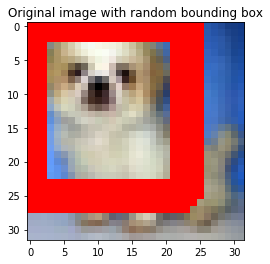

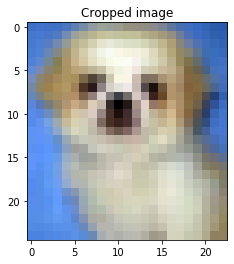

Original Images


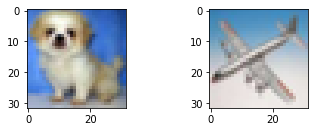

CutMix Images


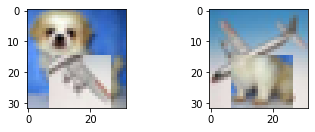

Original labels:
[[0 1]
 [1 0]]
Updated labels
[[0.33203125 0.66796875]
 [0.66796875 0.33203125]]


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rand_bbox(size, lamb):
    """ Generate random bounding box 
    Args:
        - size: [width, breadth] of the bounding box
        - lamb: (lambda) cut ratio parameter
    Returns:
        - Bounding box
    """
    W = size[0]
    H = size[1]
    cut_rat = np.sqrt(1. - lamb)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2


image_paths = ['dog4.png', 'airplane4.png']

image_batch = []

n_images = 2

for i in range(n_images):
    image = cv2.cvtColor(cv2.imread(image_paths[i]), cv2.COLOR_BGR2RGB)
    image_batch.append(image)

# Convert image_batch to numpy array
image_batch = np.array(image_batch)

image_batch_labels = [[0,1],[1,0]]
image_batch_labels = np.array(image_batch_labels)

# Read an image
image = cv2.cvtColor(cv2.imread(image_paths[0]), cv2.COLOR_BGR2RGB)

# Crop a random bounding box
lamb = 0.3
size = image.shape
bbox = rand_bbox(size, lamb)

# Draw bounding box on the image
im = image.copy()
x1 = bbox[0]
y1 = bbox[1]
x2 = bbox[2]
y2 = bbox[3]
cv2.rectangle(im, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.imshow(im);
plt.title('Original image with random bounding box')
plt.show();

# Show cropped image
plt.imshow(image[y1:y2, x1:x2]);
plt.title('Cropped image')
plt.show()


def generate_cutmix_image(image_batch, image_batch_labels, beta):
    """ Generate a CutMix augmented image from a batch 
    Args:
        - image_batch: a batch of input images
        - image_batch_labels: labels corresponding to the image batch
        - beta: a parameter of Beta distribution.
    Returns:
        - CutMix image batch, updated labels
    """
    # generate mixed sample
    lam = np.random.beta(beta, beta)
    rand_index = np.random.permutation(len(image_batch))
    target_a = image_batch_labels
    target_b = image_batch_labels[rand_index]
    bbx1, bby1, bbx2, bby2 = rand_bbox(image_batch[0].shape, lam)
    image_batch_updated = image_batch.copy()
    image_batch_updated[:, bbx1:bbx2, bby1:bby2, :] = image_batch[rand_index, bbx1:bbx2, bby1:bby2, :]
    
    # adjust lambda to exactly match pixel ratio
    lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (image_batch.shape[1] * image_batch.shape[2]))
    label = target_a * lam + target_b * (1. - lam)
    
    return image_batch_updated, label


# Generate CutMix image
# Let's use the first image of the batch as the input image to be augmented
input_image = image_batch[0]
image_batch_updated, image_batch_labels_updated = generate_cutmix_image(image_batch, image_batch_labels, 1.0)

# Show original images
print("Original Images")
for i in range(1):
    for j in range(2):
        plt.subplot(2,2,2*i+j+1)
        plt.imshow(image_batch[2*i+j])
plt.show()


# Show CutMix images
print("CutMix Images")
for i in range(1):
    for j in range(2):
        plt.subplot(2,2,2*i+j+1)
        plt.imshow(image_batch_updated[2*i+j])
plt.show()

# Print labels
print('Original labels:')
print(image_batch_labels)
print('Updated labels')
print(image_batch_labels_updated)